<a href="https://colab.research.google.com/github/eikeschuett/IcebergShipDetection/blob/main/Display_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Display some examples from dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_json('/content/drive/MyDrive/kaggle/data/train.json')
data.inc_angle = data.inc_angle.replace('na', np.nan)


In [17]:
def normalize(sig_nought, inc_angle, default_inc = None):
    """
    :type sig_nought: np.ndarray(np.float)
    :type inc_angle: float
    :rtype: np.ndarray(np.float)
    """
    
    if np.isnan(inc_angle):
        if default_inc != None:
            inc_angle = default_inc
            sig_nought_n = (sig_nought + 0.766 * inc_angle - 31.638) / 2
        else:
            sig_nought_n = sig_nought
    else:
        sig_nought_n = (sig_nought + 0.766 * inc_angle - 31.638) / 2

    return sig_nought_n


In [5]:
def lee_filter(img, size):
    # From here: https://stackoverflow.com/questions/39785970/speckle-lee-filter-in-python
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_img1(sig_nought, vmin, vmax):
    """
    :type sig_nought: np.ndarray(np.float)
    """
    plt.imshow(sig_nought, cmap = plt.cm.Greys, 
                    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax))

    cbar = plt.colorbar()
    cbar.set_label('[dB]')
    plt.show()

def plot_img2_n(sig_nought, sig_nought_n, is_iceberg):
    """
    :type sig_nought: np.ndarray(np.float)
    :type sig_nought_n: np.ndarray(np.float)
    """
    vmax=np.ceil(max(np.max(sig_nought),np.max(sig_nought_n)))
    vmin=np.floor(min(np.min(sig_nought),np.min(sig_nought_n)))

    fig, axes = plt.subplots(nrows=1, ncols=2)

    im = axes[0].imshow(sig_nought, cmap = plt.cm.Greys, 
                   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax))
    axes[1].imshow(sig_nought_n, cmap = plt.cm.Greys, 
                   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax))
    
    axes[1].set_title('(Normalized)')

    if is_iceberg == 0:
        axes[0].set_title('ship')
        #fig.suptitle("ship")
    elif is_iceberg == 1:
        axes[0].set_title('iceberg')
        #fig.suptitle("iceberg") 
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.25, 0.05, 0.5])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('[dB]')
    plt.show()

def plot_img2_p(sig_nought_hh, sig_nought_hv, is_iceberg):
    """
    :type sig_nought_hh: np.ndarray(np.float)
    :type sig_nought_hv: np.ndarray(np.float)
    """
    vmax=np.ceil(max(np.max(sig_nought_hh),np.max(sig_nought_hv)))
    vmin=np.floor(min(np.min(sig_nought_hh),np.min(sig_nought_hv)))

    fig, axes = plt.subplots(nrows=1, ncols=2)

    im = axes[0].imshow(sig_nought_hh, cmap = plt.cm.Greys, 
                   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax))
    axes[1].imshow(sig_nought_hv, cmap = plt.cm.Greys, 
                   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax))
    
    if is_iceberg == 0:
        axes[0].set_title('HH')
        axes[1].set_title('HV')
        fig.suptitle("Ship")
    elif is_iceberg == 1:
        axes[0].set_title('HV')
        axes[1].set_title('HV')
        fig.suptitle("Iceberg") 
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.25, 0.05, 0.5])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('[dB]')
    plt.show()

In [60]:
#find
ship = []
iceberg = []
for i, row in data.iterrows():
    # Reshape list to image
    if row["is_iceberg"] == 0:
        ship.append(i)
    elif row["is_iceberg"] == 1:
        iceberg.append(i)

print("In total %i ships and %i iceberg"%(len(ship), len(iceberg)))
print(iceberg)

In total 851 ships and 753 iceberg
[2, 5, 6, 10, 12, 13, 19, 21, 23, 25, 26, 28, 32, 33, 34, 35, 36, 38, 39, 40, 46, 47, 49, 50, 51, 53, 54, 58, 60, 61, 66, 68, 69, 70, 73, 74, 75, 77, 78, 81, 82, 83, 84, 85, 86, 88, 90, 91, 96, 97, 98, 99, 102, 104, 106, 108, 109, 111, 118, 119, 121, 122, 123, 124, 125, 128, 130, 131, 132, 133, 134, 135, 138, 140, 141, 144, 146, 147, 148, 150, 151, 154, 158, 160, 163, 165, 167, 169, 170, 172, 173, 175, 177, 178, 183, 192, 193, 195, 201, 202, 206, 207, 209, 210, 211, 213, 216, 223, 224, 225, 228, 229, 230, 231, 234, 236, 237, 238, 239, 241, 242, 244, 245, 246, 248, 251, 252, 253, 255, 257, 258, 259, 262, 266, 267, 268, 269, 271, 274, 275, 276, 279, 281, 282, 285, 291, 292, 293, 298, 299, 300, 302, 305, 306, 307, 308, 309, 311, 313, 314, 315, 316, 318, 319, 320, 323, 325, 326, 328, 330, 331, 334, 335, 336, 340, 346, 347, 348, 349, 352, 353, 355, 358, 359, 360, 361, 365, 366, 367, 368, 370, 371, 373, 376, 379, 380, 381, 382, 386, 389, 390, 391, 394, 395,

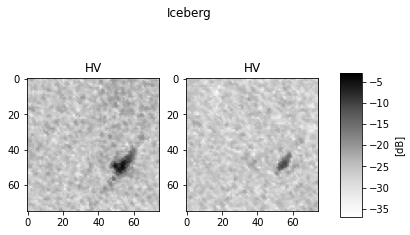

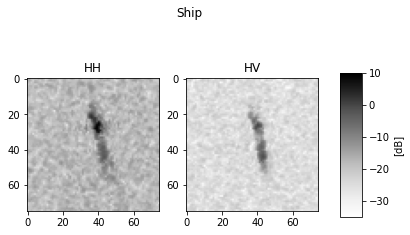

In [62]:
def read_plot(index):
    hh = np.reshape(data.loc[index]["band_1"], (75, 75))
    hv  = np.reshape(data.loc[index]["band_2"], (75, 75))
    hh_n = normalize(hh, data.loc[index]["inc_angle"], 30)
    hv_n = normalize(hv, data.loc[index]["inc_angle"], 30)

    plot_img2_p(hh, hv, data.loc[index]["is_iceberg"])

read_plot(39)
read_plot(37)


